In [1]:
from ema_workbench import Scenario, Policy, MultiprocessingEvaluator, ema_logging, load_results
from ema_workbench.analysis import prim
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.em_framework.evaluators import BaseEvaluator
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ema_workbench.analysis import parcoords
import seaborn as sns
import funs_project as fp

# Optimisation

In [2]:
ACTORNAME = "Overijssel"

In [3]:
dike_model, planning_steps = get_model_for_problem_formulation(ACTORNAME)
outcomekeys = [outcome.name for outcome in dike_model.outcomes]

## Reading

In [4]:
cases = fp.the_cases(ACTORNAME)

In [5]:
policies = fp.crude_policy_selection(ACTORNAME, 6)

In [6]:
policies = policies.sort_values(by="scenario")
policies

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs,scenario
1,0,0,0,0,0,0,3,5,0,0,5,0,0,0.000000e+00,0.000000,4.774545e+07,1
21,0,0,0,0,0,0,1,5,0,0,2,0,0,1.396212e+07,0.003764,3.864763e+07,2
12,0,0,0,0,0,0,2,4,0,0,0,0,0,4.931441e+07,0.004930,9.699218e+06,2
10,0,0,0,0,0,0,3,9,0,0,5,0,0,0.000000e+00,0.000000,5.482076e+07,2
18,0,0,0,0,0,0,0,8,0,0,5,0,0,6.651750e+05,0.000557,5.278559e+07,2
22,0,0,0,0,0,0,2,4,0,0,6,0,0,0.000000e+00,0.000000,4.996887e+07,3
34,0,0,0,0,0,0,3,0,0,0,8,0,0,7.854216e+07,0.009674,4.846921e+07,4
44,0,0,0,0,0,0,3,0,0,0,7,0,0,1.419876e+08,0.017511,4.420352e+07,4
46,0,0,0,0,0,0,3,0,0,0,3,0,0,6.008769e+08,0.072203,3.039539e+07,4
40,0,0,0,0,0,0,3,0,0,0,2,0,0,9.028940e+08,0.106645,2.764582e+07,4


In [7]:
policies.iloc[:, 0:13]

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
1,0,0,0,0,0,0,3,5,0,0,5,0,0
21,0,0,0,0,0,0,1,5,0,0,2,0,0
12,0,0,0,0,0,0,2,4,0,0,0,0,0
10,0,0,0,0,0,0,3,9,0,0,5,0,0
18,0,0,0,0,0,0,0,8,0,0,5,0,0
22,0,0,0,0,0,0,2,4,0,0,6,0,0
34,0,0,0,0,0,0,3,0,0,0,8,0,0
44,0,0,0,0,0,0,3,0,0,0,7,0,0
46,0,0,0,0,0,0,3,0,0,0,3,0,0
40,0,0,0,0,0,0,3,0,0,0,2,0,0


Below we plot per scenario 

C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)
C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\parcoords.py:261: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(h_pad=0, w_pad=0)


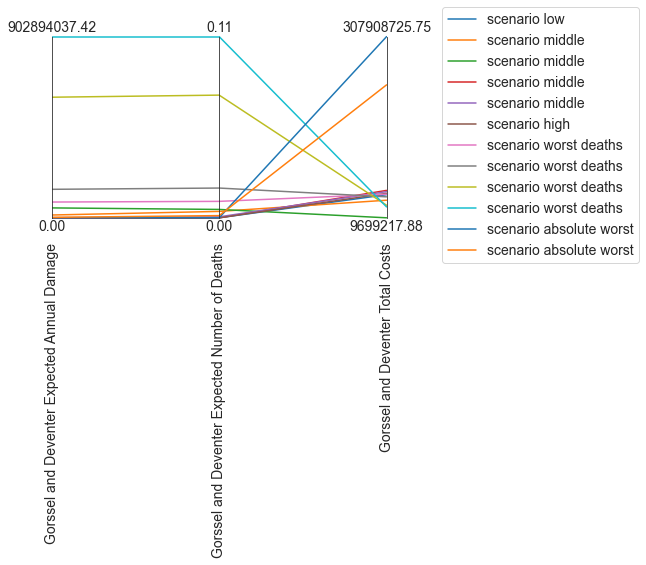

In [8]:
colors = iter(sns.color_palette(n_colors = 12))
limits = parcoords.get_limits(policies.iloc[:, 13:16])

# limits.loc[0, ['inertia', 'reliability']] = 1
# limits.loc[0, 'max_P'] = 4 # max over results based on quick inspection not shown here
# limits.loc[0, 'utility'] = 1 # max over results based on quick inspection not shown here
# limits.loc[1, :] = 0
paraxes = parcoords.ParallelAxes(limits)


for index, row in policies.iterrows():
    color = next(colors)
    paraxes.plot(row, label=f'scenario {cases[row.scenario]}', color=color)

paraxes.legend()
plt.rcParams["figure.figsize"] = (10,10)

plt.show()


# Reevaluate under deep uncertainty

## Reading

In [9]:
n_scenarios = 1000

In [10]:
du_experiments, du_outcomes = load_results("simulation/optimisation/du_scen_" + str(n_scenarios) + "_" + ACTORNAME + ".tar.gz")

In [11]:
du_experiments.columns

Index(['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2',
       '2_RfR 0', '2_RfR 1', '2_RfR 2', 'A.0_ID flood wave shape', 'A.1_Bmax',
       'A.1_Brate', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1',
       'A.1_DikeIncrease 2', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_DikeIncrease 0',
       'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2', 'A.3_pfail', 'A.4_Bmax',
       'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail',
       'discount rate 0', 'discount rate 1', 'discount rate 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'EWS_DaysToThreat', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1',
       'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1',
       'A.5_DikeIncrease 2', 'scenario', 'policy', 'model'],
      dtype='object')

### Keep only the DU experiments and outcomes that are in POLICIES

In [12]:
du_outcomes_df = pd.DataFrame.from_dict(du_outcomes)
merged_du = pd.concat([du_experiments, du_outcomes_df], axis=1)

# there is one additional policy that snuck in, 
# due to the fact that they have similar policy 
# levers that are reported within the 12. This is either 
# scenario worst deaths option 9  or scenario absolute worst option 4
# at random the later was chosen to be removed.

merged_du = merged_du[merged_du.policy != 'scenario absolute worst option 4']
merged_du

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,A.0_ID flood wave shape,...,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,100.0,...,0.0,0.0,0.0,0.0,0,scenario best option 0,dikesnet,9.668927e+07,0.005739,8.035322e+03
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,...,0.0,0.0,0.0,0.0,1,scenario best option 0,dikesnet,1.231742e+08,0.007150,1.031237e+04
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,68.0,...,0.0,0.0,0.0,0.0,2,scenario best option 0,dikesnet,9.867210e+07,0.005395,7.106948e+03
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,...,0.0,0.0,0.0,0.0,3,scenario best option 0,dikesnet,6.953149e+07,0.004751,4.919693e+03
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,15.0,...,0.0,0.0,0.0,0.0,4,scenario best option 0,dikesnet,1.551139e+08,0.006803,1.162879e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,106.0,...,0.0,10.0,1.0,0.0,995,scenario absolute worst option 10,dikesnet,0.000000e+00,0.000000,2.285044e+08
59996,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,33.0,...,0.0,10.0,1.0,0.0,996,scenario absolute worst option 10,dikesnet,4.208928e+06,0.002111,2.285044e+08
59997,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,121.0,...,0.0,10.0,1.0,0.0,997,scenario absolute worst option 10,dikesnet,0.000000e+00,0.000000,2.285044e+08
59998,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,64.0,...,0.0,10.0,1.0,0.0,998,scenario absolute worst option 10,dikesnet,3.051877e+06,0.002471,2.285044e+08


In [13]:
#now compare the policies in merged_du to the policies in 'policies' 
policies_policy_df = policies.iloc[:, 0:13]
DU_policy_selected_df = pd.merge(policies_policy_df, merged_du, how = "inner")
DU_policy_selected_df

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,...,A.5_pfail,discount rate 0,discount rate 1,discount rate 2,scenario,policy,model,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs
0,0,0,0,0,0,0,3,5,0,0,...,0.787640,2.5,2.5,4.5,0,scenario low option 0,dikesnet,8.219662e+05,0.000085,4.774552e+07
1,0,0,0,0,0,0,3,5,0,0,...,0.896312,2.5,2.5,4.5,1,scenario low option 0,dikesnet,6.785163e+06,0.000507,4.774593e+07
2,0,0,0,0,0,0,3,5,0,0,...,0.877024,2.5,2.5,2.5,2,scenario low option 0,dikesnet,1.567988e+06,0.000110,4.774554e+07
3,0,0,0,0,0,0,3,5,0,0,...,0.375721,4.5,2.5,1.5,3,scenario low option 0,dikesnet,0.000000e+00,0.000000,4.774545e+07
4,0,0,0,0,0,0,3,5,0,0,...,0.555518,2.5,1.5,3.5,4,scenario low option 0,dikesnet,3.136713e+07,0.001714,4.774773e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,1,0,0,0,0,0,2,1,0,...,0.668275,2.5,2.5,3.5,995,scenario absolute worst option 10,dikesnet,0.000000e+00,0.000000,2.285044e+08
11996,0,1,0,0,0,0,0,2,1,0,...,0.901544,1.5,4.5,3.5,996,scenario absolute worst option 10,dikesnet,4.208928e+06,0.002111,2.285044e+08
11997,0,1,0,0,0,0,0,2,1,0,...,0.096111,3.5,2.5,4.5,997,scenario absolute worst option 10,dikesnet,0.000000e+00,0.000000,2.285044e+08
11998,0,1,0,0,0,0,0,2,1,0,...,0.406535,4.5,4.5,4.5,998,scenario absolute worst option 10,dikesnet,3.051877e+06,0.002471,2.285044e+08


#### rewrite du_experiments and du_outcomes with the filtered version

In [14]:
du_outcomes_policy_df = DU_policy_selected_df[DU_policy_selected_df.columns[-3:]].copy()
du_experiments = DU_policy_selected_df[DU_policy_selected_df.columns[0:55]].copy()
du_outcomes = du_outcomes_policy_df.to_dict('series')

## Regret
Comparing alternatives
"With a regret view, a decision maker wants to minimize the regret of choosing incorrectly, where regret is the loss in performance. This regret could be the cost of assuming the wrong future scenario or the cost of choosing the wrong alternative. In the first case, maximum regret of an alternative is the difference between its performances in the best estimate future scenario and in the scenario where it shows the worst performance, for example, as applied by Kasprzyk et al. (2013). In the second case, the regret of an alternative in a certain future scenario is the difference between its performance and the best-performing alternative, as proposed by Savage (1951). Maximum regret of an alternative is its highest regret achieved over all future scenarios. In both regret cases, the alternative with the smallest maximum regret is the most robust."

https://link.springer.com/article/10.1007/s13595-017-0641-2

In [15]:
outcomekeys = list(du_outcomes.keys())
outcomekeys

['Gorssel and Deventer Expected Annual Damage',
 'Gorssel and Deventer Expected Number of Deaths',
 'Gorssel and Deventer Total Costs']

In [16]:
DAMAGE = outcomekeys[0]
DEATHS = outcomekeys[1]
COSTS = outcomekeys[2]

Regret calculation based on assignments

In [17]:
overall_scores = {}
regret = []
for scenario in du_experiments.scenario.unique():
    logical = du_experiments.scenario==scenario
    temp_results = {k:v[logical] for k,v in du_outcomes.items()}
    temp_results = pd.DataFrame(temp_results)
    temp_experiments = du_experiments[du_experiments.scenario==scenario]
    best = temp_results.min()
    scenario_regret = temp_results - best
    scenario_regret['policy'] = temp_experiments.policy.values
    regret.append(scenario_regret)

In [18]:
temp_experiments.policy.values

['scenario low option 0', 'scenario middle option 12', 'scenario middle option 3', 'scenario middle option 1', 'scenario middle option 9', ..., 'scenario worst deaths option 13', 'scenario worst deaths option 15', 'scenario worst deaths option 9', 'scenario absolute worst option 7', 'scenario absolute worst option 10']
Length: 12
Categories (60, object): ['scenario absolute worst option 0', 'scenario absolute worst option 1', 'scenario absolute worst option 10', 'scenario absolute worst option 2', ..., 'scenario worst deaths option 6', 'scenario worst deaths option 7', 'scenario worst deaths option 8', 'scenario worst deaths option 9']

In [19]:
regret = pd.concat(regret)
maxregret = regret.groupby('policy').max().dropna()

In [20]:
maxregret

,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs
policy,,,
scenario absolute worst option 10,1.732519e+08,0.061058,2.188092e+08
scenario absolute worst option 7,1.453990e+08,0.006943,2.982154e+08
scenario high option 0,6.535865e+08,0.108780,4.027367e+07
scenario low option 0,8.807882e+08,0.114561,3.805669e+07
scenario middle option 1,8.807882e+08,0.114561,4.513200e+07
scenario middle option 12,1.516642e+09,0.404481,2.895181e+07
scenario middle option 3,1.516642e+09,0.170558,0.000000e+00
scenario middle option 9,8.807882e+08,0.978414,4.309040e+07
scenario worst deaths option 13,4.882732e+08,0.063501,3.450904e+07


#### renaming policies for legend
rename policy names to things that will stick and we'll remember
In the order that they are above, replace with 
O_0, O_1, O_2, O_3, O_4, O_5, O_5, O_7, O_8, O_9, O_10, O_11,

In [21]:
old_names = maxregret.index.values.tolist()
new_names = []
dict_naming = {}

for i in range(len(maxregret)):
    name = "O_" + str(i)
    #print(name)
    new_names.append(name)
dict_naming = {old_names[i]: new_names[i] for i in range(len(old_names))}
#dict_naming    

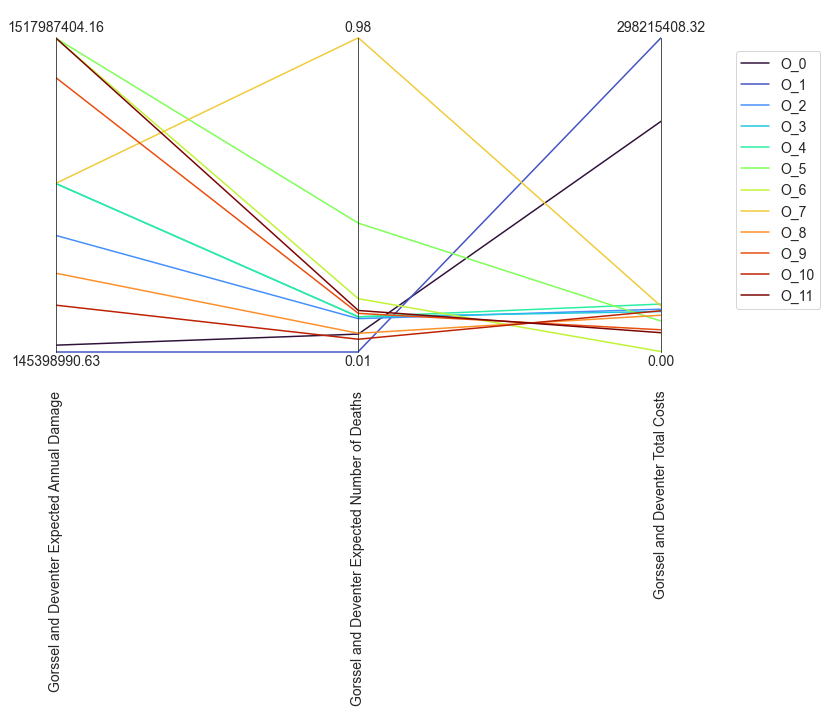

In [22]:
from matplotlib import cm

limits = parcoords.get_limits(maxregret)
paraxes = parcoords.ParallelAxes(maxregret)


cmap = cm.get_cmap('turbo', maxregret.shape[0])
i=0
for index, row in maxregret.iterrows():
    paraxes.plot(row, color=cmap.colors[i], label=dict_naming[index])
    i+=1
    
paraxes.legend()
plt.savefig("../../report/figures/results/regret_figure"+ "_" + ACTORNAME+ ".png", bbox_inches="tight")
plt.show()

## Satisficing
Performance threshold
"seeks a decision alternative that meets his or her performance requirements over the range of plausible future scenarios. "

In [23]:
satisfycing_df = policies.copy()
satisfycing_df.drop_duplicates(inplace=True)
#satisfycing_df

In [24]:
belowtresh_df = satisfycing_df.loc[(satisfycing_df['Gorssel and Deventer Expected Annual Damage'] < fp.thresholds_overijssel['Gorssel and Deventer Expected Annual Damage']) & \
                    (satisfycing_df['Gorssel and Deventer Expected Number of Deaths'] < fp.thresholds_overijssel['Gorssel and Deventer Expected Number of Deaths']) & \
                    (satisfycing_df['Gorssel and Deventer Total Costs'] < fp.thresholds_overijssel['Gorssel and Deventer Total Costs']),:].copy()
belowtresh_df.sort_index(inplace=True, ascending = False)
belowtresh_df

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs,scenario


In [25]:
limits_df = belowtresh_df.iloc[:, -4:-1]
colors = iter(sns.color_palette())
limits = parcoords.get_limits(limits_df)

In [26]:

overall_scores = {}
for policy in du_experiments.policy.unique():
    logical = du_experiments.policy == policy
    scores = {}
    for k, v in du_outcomes.items():
        try:
            n = np.sum(v[logical]<=fp.thresholds_overijssel[k])
        except KeyError:
            continue
        scores[k] = n/1000 
    overall_scores[policy] = scores
        
overall_scores = pd.DataFrame(overall_scores).T

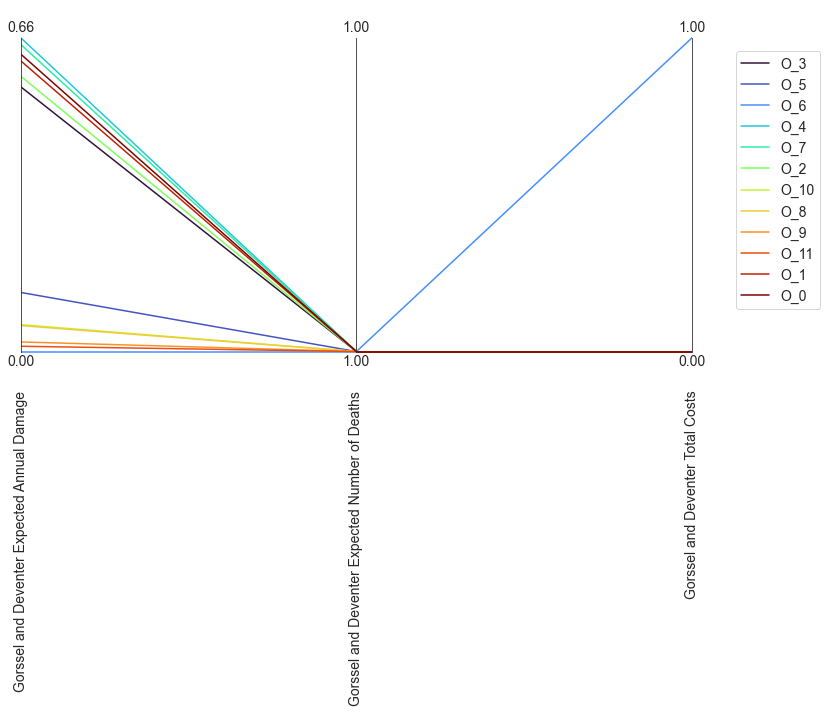

In [27]:
from matplotlib import cm

limits = parcoords.get_limits(overall_scores)
paraxes = parcoords.ParallelAxes(limits)


cmap = cm.get_cmap('turbo', overall_scores.shape[0])
i=0
for index, row in overall_scores.iterrows():

    paraxes.plot(row, color=cmap.colors[i], label=dict_naming[index])
    i+=1
    
paraxes.legend()
plt.savefig("../../report/figures/results/domain_criterion"+ "_" + ACTORNAME+ ".png", bbox_inches="tight")
plt.show()

In [28]:
overall_scores

,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs
scenario low option 0,0.554,1.0,0.0
scenario middle option 12,0.126,1.0,0.0
scenario middle option 3,0.003,1.0,1.0
scenario middle option 1,0.656,1.0,0.0
scenario middle option 9,0.642,1.0,0.0
scenario high option 0,0.576,1.0,0.0
scenario worst deaths option 3,0.059,1.0,0.0
scenario worst deaths option 13,0.057,1.0,0.0
scenario worst deaths option 15,0.023,1.0,0.0
scenario worst deaths option 9,0.014,1.0,0.0


## Scoring policies

### Normalise the regret and take the average to score the policies


In [29]:
from sklearn import preprocessing

In [30]:
#Normalize the regret results
regret_scores = maxregret.copy()
regret_average = regret_scores.apply(lambda x: x/x.max(), axis=0)


In [31]:
#Get the average for each policy
regret_average['average regret'] = regret_average.mean(numeric_only=True, axis=1)
regret_average.sort_values(by='average regret', ascending = False, inplace = True) #Lower = better
regret_average

,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs,average regret
policy,,,,
scenario middle option 9,0.580234,1.000000,0.144494,0.574909
scenario middle option 12,0.999114,0.413405,0.097084,0.503201
scenario worst deaths option 9,1.000000,0.137075,0.060024,0.399033
scenario middle option 3,0.999114,0.174321,0.000000,0.391145
scenario absolute worst option 7,0.095784,0.007096,1.000000,0.367627
scenario worst deaths option 15,0.885726,0.127869,0.069324,0.360973
scenario absolute worst option 10,0.114133,0.062405,0.733729,0.303422
scenario middle option 1,0.580234,0.117089,0.151340,0.282888
scenario low option 0,0.580234,0.117089,0.127615,0.274979


###  Use the satisficing / domain criterion and take their average to score the policies


In [32]:
#Get the average for each policy
satisficing_average = overall_scores.copy()
satisficing_average['average satisficing'] = satisficing_average.mean(numeric_only=True, axis=1)
satisficing_average.sort_values(by='average satisficing', ascending = True, inplace = True) #higher = better
satisficing_average

,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs,average satisficing
scenario worst deaths option 9,0.014,1.0,0.0,0.338000
scenario worst deaths option 15,0.023,1.0,0.0,0.341000
scenario worst deaths option 13,0.057,1.0,0.0,0.352333
scenario worst deaths option 3,0.059,1.0,0.0,0.353000
scenario middle option 12,0.126,1.0,0.0,0.375333
scenario low option 0,0.554,1.0,0.0,0.518000
scenario high option 0,0.576,1.0,0.0,0.525333
scenario absolute worst option 7,0.608,1.0,0.0,0.536000
scenario absolute worst option 10,0.622,1.0,0.0,0.540667
scenario middle option 9,0.642,1.0,0.0,0.547333


### Add them together  

In [33]:
merged_df = pd.concat([satisficing_average, regret_average], join="inner", axis = 1)


In [34]:
merged_df.sort_values(by='average satisficing', inplace = True, ascending = True)
merged_df.sort_values(by='average regret', inplace = True, ascending = False)
merged_df

,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs,average satisficing,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs,average regret
scenario middle option 9,0.642,1.0,0.0,0.547333,0.580234,1.000000,0.144494,0.574909
scenario middle option 12,0.126,1.0,0.0,0.375333,0.999114,0.413405,0.097084,0.503201
scenario worst deaths option 9,0.014,1.0,0.0,0.338000,1.000000,0.137075,0.060024,0.399033
scenario middle option 3,0.003,1.0,1.0,0.667667,0.999114,0.174321,0.000000,0.391145
scenario absolute worst option 7,0.608,1.0,0.0,0.536000,0.095784,0.007096,1.000000,0.367627
scenario worst deaths option 15,0.023,1.0,0.0,0.341000,0.885726,0.127869,0.069324,0.360973
scenario absolute worst option 10,0.622,1.0,0.0,0.540667,0.114133,0.062405,0.733729,0.303422
scenario middle option 1,0.656,1.0,0.0,0.552000,0.580234,0.117089,0.151340,0.282888
scenario low option 0,0.554,1.0,0.0,0.518000,0.580234,0.117089,0.127615,0.274979
scenario high option 0,0.576,1.0,0.0,0.525333,0.430561,0.111179,0.135049,0.225597


In [35]:
#take te most robust policies and put them into a df.
robust_policies = merged_df.tail(5)
robust_policies

,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs,average satisficing,Gorssel and Deventer Expected Annual Damage,Gorssel and Deventer Expected Number of Deaths,Gorssel and Deventer Total Costs,average regret
scenario middle option 1,0.656,1.0,0.0,0.552000,0.580234,0.117089,0.151340,0.282888
scenario low option 0,0.554,1.0,0.0,0.518000,0.580234,0.117089,0.127615,0.274979
scenario high option 0,0.576,1.0,0.0,0.525333,0.430561,0.111179,0.135049,0.225597
scenario worst deaths option 13,0.057,1.0,0.0,0.352333,0.321658,0.064902,0.115718,0.167426
scenario worst deaths option 3,0.059,1.0,0.0,0.353000,0.229514,0.046098,0.130038,0.135216


In [36]:
#now to return to an original list of policies with this
policy_names = robust_policies.index.values.tolist()

In [37]:
policy_names

['scenario middle option 1',
 'scenario low option 0',
 'scenario high option 0',
 'scenario worst deaths option 13',
 'scenario worst deaths option 3']

In [38]:
temp_results = DU_policy_selected_df[DU_policy_selected_df['policy'].isin(policy_names)]

In [39]:
lever_names = policies_policy_df.columns.values.tolist()
lever_names

['3_RfR 0',
 '3_RfR 1',
 '3_RfR 2',
 '4_RfR 0',
 '4_RfR 1',
 '4_RfR 2',
 'EWS_DaysToThreat',
 'A.4_DikeIncrease 0',
 'A.4_DikeIncrease 1',
 'A.4_DikeIncrease 2',
 'A.5_DikeIncrease 0',
 'A.5_DikeIncrease 1',
 'A.5_DikeIncrease 2']

In [40]:
robust_policies_results = temp_results[lever_names].drop_duplicates()

In [41]:
robust_policies_results

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
0,0,0,0,0,0,0,3,5,0,0,5,0,0
3000,0,0,0,0,0,0,3,9,0,0,5,0,0
5000,0,0,0,0,0,0,2,4,0,0,6,0,0
6000,0,0,0,0,0,0,3,0,0,0,8,0,0
7000,0,0,0,0,0,0,3,0,0,0,7,0,0


In [42]:
robust_policies_results.to_csv('simulation/selected/selected_policies_' + ACTORNAME + '.csv')

In [43]:
lever_names.append('policy')
robust_policies_results_names = temp_results[lever_names].drop_duplicates()
robust_policies_results_names.set_index('policy', inplace = True)
robust_policies_results_names

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
policy,,,,,,,,,,,,,
scenario low option 0,0,0,0,0,0,0,3,5,0,0,5,0,0
scenario middle option 1,0,0,0,0,0,0,3,9,0,0,5,0,0
scenario high option 0,0,0,0,0,0,0,2,4,0,0,6,0,0
scenario worst deaths option 3,0,0,0,0,0,0,3,0,0,0,8,0,0
scenario worst deaths option 13,0,0,0,0,0,0,3,0,0,0,7,0,0


Plot for Overijssel both robusness things in one

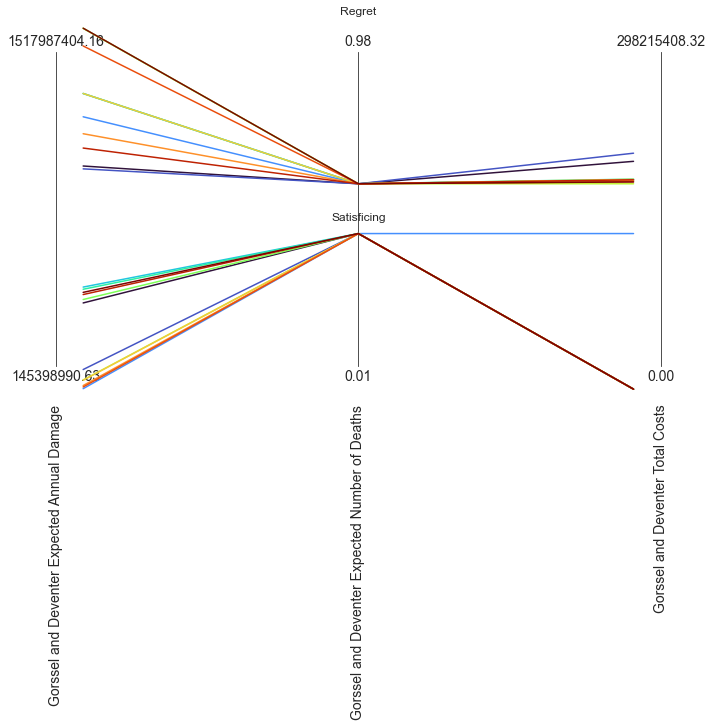

In [76]:
# fig, axs = plt.subplots(2)
# fig.suptitle('Robustness results Overijssel')



#regret plotting
limits = parcoords.get_limits(maxregret)
parax = parcoords.ParallelAxes(limits)

axs = parax.fig.subplots(2)

axs[0].set_axis_off()
axs[1].set_axis_off()

cmap = cm.get_cmap('turbo', maxregret.shape[0])
i=0
for index, row in maxregret.iterrows():
    axs[0].plot(row, color=cmap.colors[i], label=dict_naming[index])
    i+=1


axs[0].set_title("Regret")
    
axs[1].set_title("Satisficing")
    
#print(dir(axs[0]))
cmap = cm.get_cmap('turbo', overall_scores.shape[0])
i=0
for index, row in overall_scores.iterrows():
    axs[1].plot(row, color=cmap.colors[i], label=dict_naming[index])
    i+=1
    